In [82]:
# Import modules
%matplotlib inline
import matplotlib
import scipy as sp
import matplotlib.pyplot as plt
# Select random seed
random_state = 1

# Model Complexity

We make use of scikit pipiline mechanism to estimate linear classification of different order

In [83]:
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import PolynomialFeatures

Th PolynomialFeatures functions generates higher order polynoms from the initial samples. For instances, from (x_1, x_2) we could generate (1, x_1, x_2, x_1x_2, x_1^2,x_2^2). It can be usefull when the decision boundary is not linear.

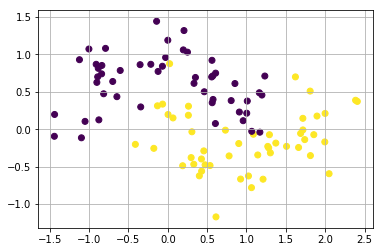

In [84]:
from sklearn.datasets import make_moons
X,y = make_moons(n_samples=100, random_state=random_state, noise=0.25)

We split the initial set in two sets: one use for training the model, and one use to compute the validation error
    

y[y==0]=-1
plt.scatter(X[:,0], X[:,1],c=y)
plt.grid()
# Plot the decision functions
XX, YY = sp.meshgrid(sp.linspace(X[:,0].min(), X[:,0].max(),200),
                     sp.linspace(X[:,1].min(), X[:,1].max(),200))
XY = sp.vstack([ XX.flatten(), YY.flatten() ]).T

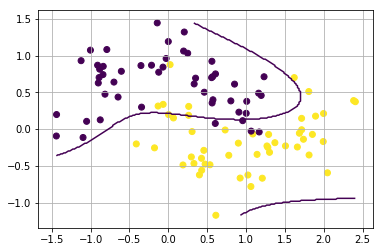

In [89]:
from sklearn import linear_model
degree = 4 # Degree of the polynomial 1 ->20
model = make_pipeline(PolynomialFeatures(degree), linear_model.RidgeClassifier(alpha=1e-6,normalize=True))
model.fit(X, y)
yp= model.predict(XY)
plt.contour(XX,YY,yp.reshape(XX.shape),[0])
plt.grid()
plt.scatter(X[:,0], X[:,1], c=y)


# Test error VS Train Error

In [90]:
from sklearn.model_selection import train_test_split

. Then we can see the influence of the polynom order on the classifification accuracy.

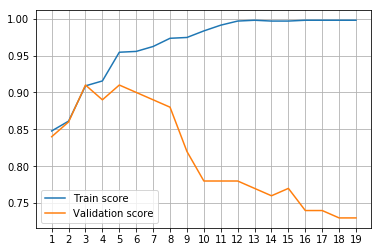

In [92]:
from sklearn.model_selection import validation_curve
poly = PolynomialFeatures()
lin_model = linear_model.RidgeClassifier(alpha=1e-8,normalize=True)

pipe = Pipeline(steps=[('poly', poly), ('lin_model', lin_model)])
train_scores, valid_scores = validation_curve(pipe, X, y, "poly__degree", range(1,20), cv=10)
plt.plot(range(1, 20), train_scores.mean(axis=1), label="Train score")
plt.plot(range(1, 20), valid_scores.mean(axis=1), label="Validation score")
plt.grid()
plt.xticks(range(1, 20))
plt.legend()